In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
wine = datasets.load_wine()

In [3]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
x = wine.data[:, :2]
y = wine.target

In [5]:
light = ListedColormap(["orange", "cyan", "cornflowerblue"])
dark = ["darkgreen", "darkred", "darkblue"]

In [6]:
n_neighbors = 25

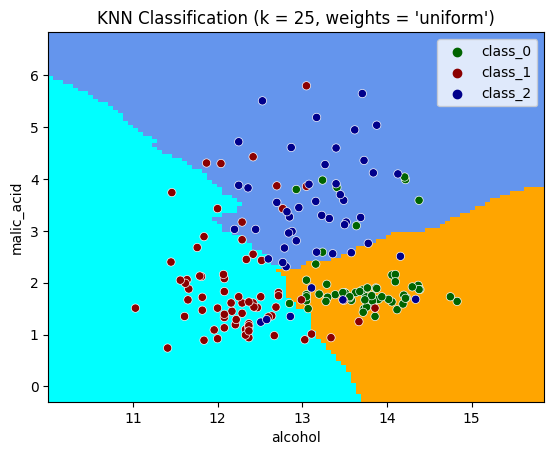

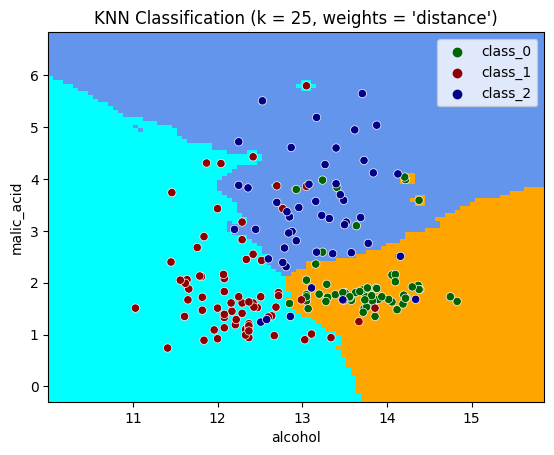

In [9]:
for weights in ["uniform", "distance"]:
    knn = neighbors.KNeighborsClassifier(
        n_neighbors, 
        weights = weights)
    knn.fit(x, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        knn,
        x,
        cmap = light,
        ax = ax,
        response_method = "predict",
        plot_method = "pcolormesh",
        xlabel = wine.feature_names[0],
        ylabel = wine.feature_names[1],
        shading = "auto"
    )
    sns.scatterplot(
        x = x[:, 0],
        y = x[:, 1],
        hue = wine.target_names[y],
        palette = dark,
        alpha = 1.0
    )
    plt.title("KNN Classification (k = %i, weights = '%s')" % (n_neighbors, weights))
plt.show()